In [23]:
import pandas as pd
MLB_full_2022 = pd.read_csv('MLBfull_2022.csv')

def table_filt(table,*args):
    for i in args:
        table = table[~table[i].isna()]
    return table

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'white'

In [6]:
import seaborn as sns

In [3]:
def extractWeightedIndex(x):
    '''Input: Catcher groupby [['P','pitch_type']]
    Returns index for catcher weighted by pitch'''
    def extractIndex(y):
        '''Input: Pitcher groupby
        Returns index for the pitcher'''
        return len(y)-sum(((y.groupby('pitch_type').value_counts())**2)/len(y))
    return sum(x.groupby('P').apply(extractIndex))/len(x)

In [8]:
catcher_variance = table_filt(MLB_full_2022,'C','pitch_type','P').groupby('C')[['P','pitch_type']].apply(extractWeightedIndex)

In [9]:
catcher_variance['Martín Maldonado']

0.64354494374271709

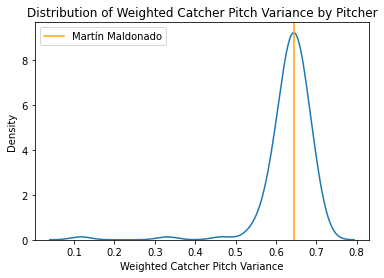

In [18]:
sns.kdeplot(data=catcher_variance)
plt.axvline(catcher_variance['Martín Maldonado'],color='orange',label = 'Martín Maldonado')
plt.xlabel('Weighted Catcher Pitch Variance')
plt.title('Distribution of Weighted Catcher Pitch Variance by Pitcher')
plt.legend()
#plt.show()

In [14]:
def extractWeightedIndexPA(x):
    '''Input: Catcher groupby [['pitch_type','game_pk','at_bat_number']]
    Returns index for catcher weighted by pitch'''
    def extractIndexPA(y):
        '''Input: Pitcher groupby
        Returns index for the pitcher'''
        return len(y)-sum(((y.groupby('pitch_type').value_counts())**2)/len(y))
    return sum(x.groupby(['game_pk','at_bat_number']).apply(extractIndexPA))/len(x)

In [15]:
catcher_variancePA = table_filt(MLB_full_2022,'C','pitch_type','game_pk','at_bat_number').groupby('C')[['game_pk','at_bat_number','pitch_type']].apply(extractWeightedIndexPA)

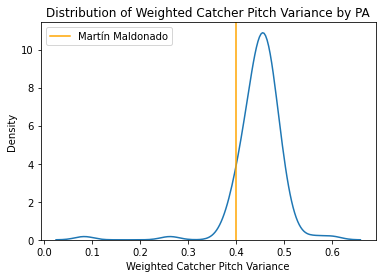

In [20]:
sns.kdeplot(data=catcher_variancePA)
plt.axvline(catcher_variancePA['Martín Maldonado'],color='orange',label = 'Martín Maldonado')
plt.xlabel('Weighted Catcher Pitch Variance')
plt.title('Distribution of Weighted Catcher Pitch Variance by PA')
plt.legend()

In [22]:
catcher_variancePA.sort_values(ascending=False)

C
Yainer Diaz        0.600000
Mario Feliciano    0.562537
Connor Wong        0.524019
Alex Jackson       0.513979
Tomás Nido         0.509209
                     ...   
Freddy Fermin      0.387886
Caleb Hamilton     0.382870
Korey Lee          0.370205
Donny Sands        0.262121
Yermín Mercedes    0.083333
Length: 120, dtype: float64